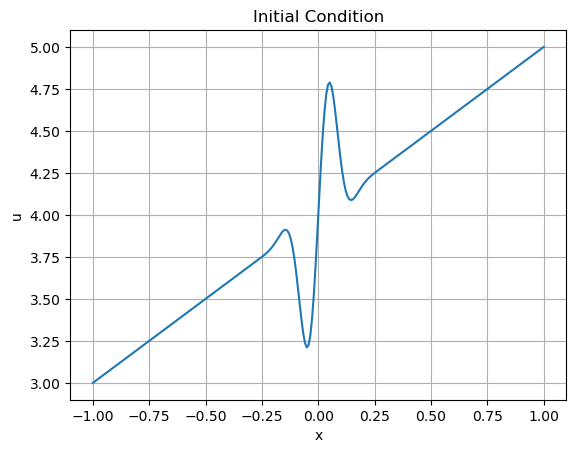

In [91]:
##Testing FFT  method to solve 1d diffusion equation (just a simple pde that I know has periodic eigenvalues)
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 2  # Length of the domain
N = 256  # Number of grid points (including boundary points)
alpha = 0.1  # Diffusion coefficient
dx = L /N  # Spatial step
dt = 0.0001  # Time step
T = 0.1  # Total time
x = np.linspace(-1, 1, N)  # Spatial grid

# Initial condition (Gaussian profile)
u_initial = np.exp(-100 * (x )**2)*np.sin(25*x)+x+4

# Boundary conditions
u_initial[0] = 3
u_initial[-1] = 5
#print(len(u_initial))
# Plot initial condition
plt.plot(x, u_initial)
plt.title('Initial Condition')
plt.xlabel('x')
plt.ylabel('u')
plt.grid(True)
plt.show()

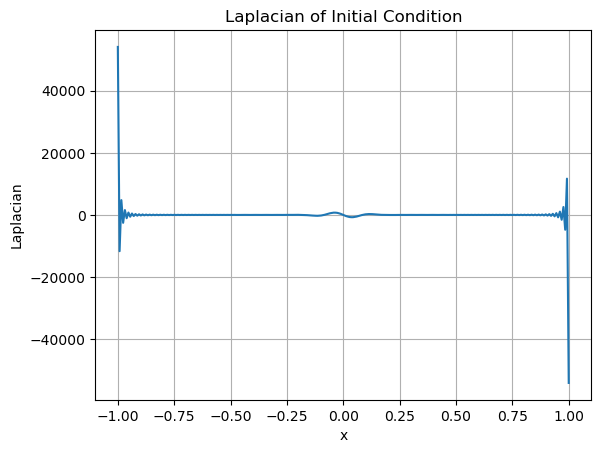

In [92]:
from scipy.fftpack import fft, ifft

# Function to compute the Fourier transform of the Laplacian
def laplacian_fourier(u):
    #DEPRECATED FUNCTION DEPRECATED FUNCTION
    # Exclude boundary points
    u_inner = u
    # Compute Fourier transform
    u_fft = fft(u_inner)
    # Define wave numbers
    k = np.fft.fftfreq(N, d=dx) * 2 * np.pi
    # Compute the Fourier transform of the Laplacian
    laplacian_fft = -k**2 * u_fft
    #print(laplacian_fft.shape)
    # Inverse Fourier transform to get the Laplacian in the spatial domain
    laplacian_spatial = ifft(laplacian_fft).real
    
    # Apply boundary conditions
    #laplacian_full = laplacian_spatial
    return laplacian_spatial

# Test the laplacian_fourier function with the initial condition
laplacian_u_initial = laplacian_fourier(u_initial)
#print(x.shape,laplacian_u_initial.shape)
# Plotting the Laplacian in spatial domain
plt.plot(x, laplacian_u_initial)
plt.title('Laplacian of Initial Condition')
plt.xlabel('x')
plt.ylabel('Laplacian')
plt.grid(True)
plt.show()

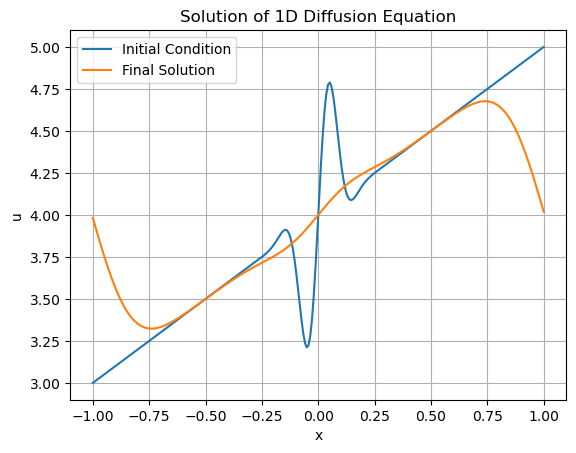

In [93]:
from scipy.fftpack import fft, ifft

# Function to evolve the system in Fourier space
def integrate_pde(u_initial, alpha, dx, dt, T,N):
    # Initial Fourier transform
    u_fft = fft(u_initial)
    
    # Wave numbers
    k = np.fft.fftfreq(N, d=dx) * 2 * np.pi
    
    # Time steps
    N_time_steps = int(T / dt)
    
    # Time evolution in Fourier space
    #backward euler
    for n in range(N_time_steps):
        u_fft = u_fft / (1 + alpha * dt * k**2)
        
    # Inverse Fourier transform to get the final solution in real space
    u_final = ifft(u_fft).real
    
    return u_final

# Integrate the PDE
u_final = integrate_pde(u_initial, alpha, dx, dt, T,N)

# Plot the final solution
plt.plot(x, u_initial, label="Initial Condition")
plt.plot(x, u_final, label="Final Solution")
plt.title('Solution of 1D Diffusion Equation')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)
plt.show()



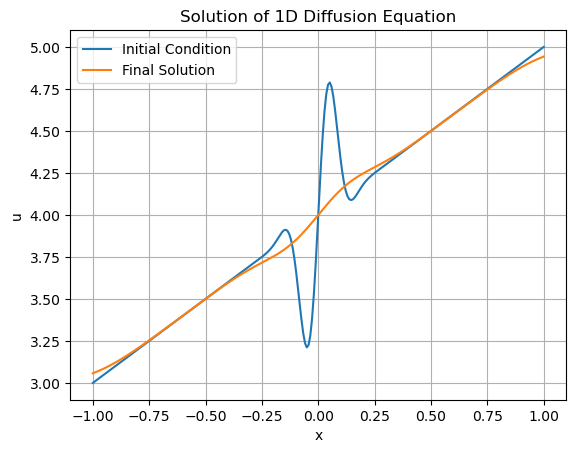

In [94]:
##TESTING PADDING FOR DIRICHLET NON PERIODIC CONDITIONS
# Parameters for padding
padding_factor = 2  # Number of times to extend the domain

# Extend the domain and initial condition
N_extended = N * padding_factor
x_extended = np.linspace(-1 * padding_factor, 1 * padding_factor, N_extended)
u_initial_extended = np.exp(-100 * (x_extended)**2)*np.sin(25*x_extended) + x_extended + 4
u_initial_extended[:N//2] = 3  # Left padding with boundary value
u_initial_extended[-N//2:] = 5  # Right padding with boundary value
u_final = integrate_pde(u_initial_extended, alpha, dx, dt, T,N_extended)
# Extract the solution in the original domain by removing padding
u_final = u_final[N//2:-N//2]
# Plot the final solution
plt.plot(x, u_initial, label="Initial Condition")
plt.plot(x, u_final, label="Final Solution")
plt.title('Solution of 1D Diffusion Equation')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)
plt.show()
#YOU PAD WITH THE BOUNDARY CONDITION TO ACHIEVE BOUNDARY CONDITION

/var/folders/yb/7hrfky4s2s323mmcv1_rg71c0000gn/T/ipykernel_86839/1846742315.py:20: RuntimeWarning: overflow encountered in add
  u += u_transformed[i] * np.roll(window, -i) * np.exp(2j * np.pi * i * np.arange(N) / N)
/var/folders/yb/7hrfky4s2s323mmcv1_rg71c0000gn/T/ipykernel_86839/1846742315.py:10: RuntimeWarning: invalid value encountered in multiply
  transformed[i] = np.sum(u * np.roll(window, i) * np.exp(-2j * np.pi * i * np.arange(N) / N))
/Users/rishi/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/rishi/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/yb/7hrfky4s2s323mmcv1_rg71c0000gn/T/ipykernel_86839/1846742315.py:33: RuntimeWarning: invalid value encountered in true_divide
  u_transformed = u_transforme

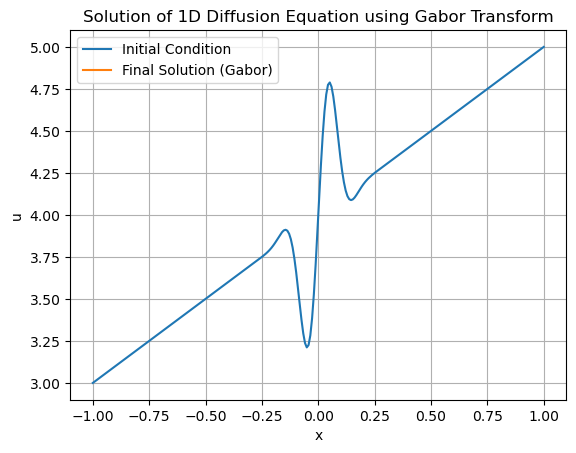

In [96]:
import pywt
# Define the Gabor transform and its inverse
window_size = 5  # Size of the Gabor window
def gabor_transform(u, window_size):
    N = len(u)
    transformed = np.zeros_like(u, dtype=complex)
    window = np.exp(-0.5 * (np.linspace(-window_size, window_size, N) / window_size)**2)
    
    for i in range(N):
        transformed[i] = np.sum(u * np.roll(window, i) * np.exp(-2j * np.pi * i * np.arange(N) / N))
    
    return transformed

def inverse_gabor_transform(u_transformed, window_size):
    N = len(u_transformed)
    u = np.zeros_like(u_transformed, dtype=complex)
    window = np.exp(-0.5 * (np.linspace(-window_size, window_size, N) / window_size)**2)
    
    for i in range(N):
        u += u_transformed[i] * np.roll(window, -i) * np.exp(2j * np.pi * i * np.arange(N) / N)
    
    return np.real(u)
# Function to integrate the PDE using Gabor transform
def integrate_pde_gabor(u_initial, alpha, dx, dt, T, window_size):
    u = u_initial.copy()
    N_time_steps = int(T / dt)
    
    for _ in range(N_time_steps):
        # Gabor transform
        u_transformed = gabor_transform(u, window_size)
        
        # Time evolution in Gabor domain (using a simplified Euler method)
        u_transformed = u_transformed / (1 + alpha * dt)
        
        # Inverse Gabor transform
        u = inverse_gabor_transform(u_transformed, window_size)
        
        # Apply boundary conditions (Dirichlet)
        u[0] = 3
        u[-1] = 5
    
    return u

# Integrate the PDE using Gabor transform
u_final_gabor = integrate_pde_gabor(u_initial, alpha, dx, dt, T, window_size)

# Plot the results
plt.plot(x, u_initial, label="Initial Condition")
plt.plot(x, u_final_gabor, label="Final Solution (Gabor)")
plt.title('Solution of 1D Diffusion Equation using Gabor Transform')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)
plt.show()
